In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


In [2]:
df_cct = pd.read_parquet("/home/onyxia/work/df_cct_final.parquet")

## I. OneHotEncoder

In [3]:
# Pour "Use Chip":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Use Chip"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [4]:
# Pour "Merchant State" : 


enc = OneHotEncoder(handle_unknown='ignore',  max_categories=10) #on se limite aux 10 premières catégories

features_array = enc.fit_transform(df_cct[["Merchant State"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [5]:
# Pour "Merchant City" : 

enc = OneHotEncoder(handle_unknown='ignore',  max_categories=10)

features_array = enc.fit_transform(df_cct[["Merchant City"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [6]:
# Pour "day_of_week" : 

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["day_of_week"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

## II. Sorting the columns and creating X1, y

In [7]:
selection = ['User', 'Card', 'Month', 'Day', 'Hours', 'Amount',
       'delta_t_s', 'delta_t_s_card', 'amt/daily_income', 'Retired',
       'daily_amount', 'nb_daily_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt', 'last_3d_amt/nbt', 'Chip Transaction',
       'Online Transaction', 'Swipe Transaction', 'Merchant State_CA',
       'Merchant State_FL', 'Merchant State_IL', 'Merchant State_NC',
       'Merchant State_NY', 'Merchant State_OH', 'Merchant State_PA',
       'Merchant State_TX', 'Merchant State_None',
       'Merchant State_infrequent_sklearn', 'Merchant City_Brooklyn',
       'Merchant City_Chicago', 'Merchant City_Dallas',
       'Merchant City_Houston', 'Merchant City_Indianapolis',
       'Merchant City_Los Angeles', 'Merchant City_Miami',
       'Merchant City_ONLINE', 'Merchant City_Orlando',
       'Merchant City_infrequent_sklearn', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday','Is Fraud?']

In [8]:
estimators = ['User', 'Card', 'Month', 'Day', 'Hours', 'Amount',
       'delta_t_s', 'delta_t_s_card', 'amt/daily_income', 'Retired',
       'daily_amount', 'nb_daily_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt', 'last_3d_amt/nbt', 'Chip Transaction',
       'Online Transaction', 'Swipe Transaction', 'Merchant State_CA',
       'Merchant State_FL', 'Merchant State_IL', 'Merchant State_NC',
       'Merchant State_NY', 'Merchant State_OH', 'Merchant State_PA',
       'Merchant State_TX', 'Merchant State_None',
       'Merchant State_infrequent_sklearn', 'Merchant City_Brooklyn',
       'Merchant City_Chicago', 'Merchant City_Dallas',
       'Merchant City_Houston', 'Merchant City_Indianapolis',
       'Merchant City_Los Angeles', 'Merchant City_Miami',
       'Merchant City_ONLINE', 'Merchant City_Orlando',
       'Merchant City_infrequent_sklearn', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday']

df_selec = df_cct[selection]
#df_selec = df_selec[np.isfinite(df_selec).all(1)]
X1 = df_selec[estimators]
y = df_selec["Is Fraud?"]


In [9]:
#X1.fillna(0, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, 
                                                    train_size = 0.70, test_size = 0.30, stratify = y, random_state = 1)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

: 

: 

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6451132
           1       0.00      0.00      0.00      1472

    accuracy                           1.00   6452604
   macro avg       0.50      0.50      0.50   6452604
weighted avg       1.00      1.00      1.00   6452604



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

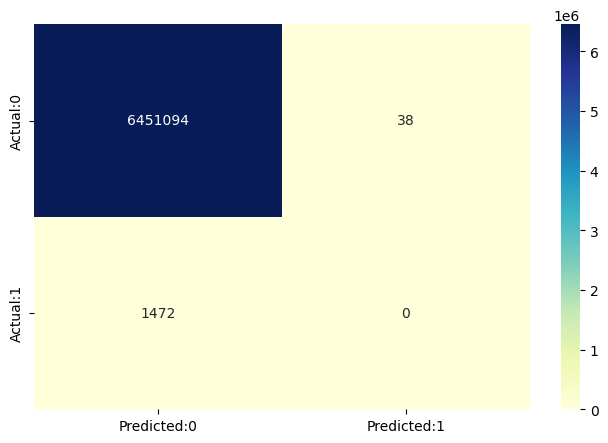

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
X_train

,Amount,Zip,MCC,delta_t_s,delta_t_s_card,amt/day_income,merchant_user_state_is_diff,rolling_nb_frauds_wk,rolling_nbt_wk,rolling_amt_wk,rolling_amt_med_wk,rolling_nbt_wk/amt_wk
6548602,8.10,44428.0,5812,56400,56400,0.079019,0,0.0,11.0,403.77,44.81,0.027243
20317810,15.31,38650.0,5970,28860,49260,0.223071,0,0.0,26.0,328.79,10.77,0.079078
336885,1.82,77061.0,5814,70740,70740,0.021172,0,0.0,13.0,565.29,15.23,0.022997
22826374,4.19,98467.0,5411,660,660,0.036867,0,0.0,25.0,771.78,17.23,0.032393
2560179,11.32,8901.0,5411,27660,27660,0.039466,0,0.0,37.0,1296.01,22.41,0.028549
...,...,...,...,...,...,...,...,...,...,...,...,...
23794938,12.74,62858.0,5812,0,172080,0.142746,0,0.0,19.0,158.45,2.32,0.119912
4821140,120.00,11236.0,4829,33900,76800,0.947396,0,0.0,25.0,1512.75,63.33,0.016526
5832204,10.04,33062.0,9402,48120,48120,0.091293,0,0.0,29.0,1130.38,20.87,0.025655
19125327,28.16,53206.0,7538,33060,33060,0.504412,0,0.0,7.0,89.12,6.06,0.078546
